In [1]:
# import dependencies
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt


In [2]:
# set variable to call csv files
cities= "Resources/all_cities_years.csv"
weather = "Resources/top_cities_average_weather.csv"

In [3]:
# import csv for cities with passengers file and delete unwanted column
cities_df = pd.read_csv(cities)
del cities_df["Unnamed: 0"]
cities_df

,Destination City,January,February,March,April,May,June,July,August,September,October,November,December
0,"Amsterdam, Netherlands (2013)",89425.0,73576.0,104179.0,124295.0,155463.0,161462.0,148674.0,165006.0,146622.0,127654.0,96116.0,106061.0
1,"Amsterdam, Netherlands (2014)",92024.0,75205.0,103942.0,110880.0,142314.0,148705.0,132277.0,154280.0,150822.0,132861.0,100080.0,106302.0
2,"Amsterdam, Netherlands (2015)",92506.0,73814.0,102489.0,131397.0,158984.0,163851.0,148313.0,168319.0,161552.0,143006.0,94755.0,101573.0
3,"Amsterdam, Netherlands (2016)",90014.0,75229.0,110462.0,144508.0,161621.0,161598.0,147317.0,159403.0,152280.0,137474.0,98660.0,110715.0
4,"Amsterdam, Netherlands (2017)",93557.0,80137.0,118879.0,153882.0,177235.0,175705.0,159835.0,177119.0,168446.0,144774.0,110022.0,118295.0
5,"Cancun, Mexico (2013)",243338.0,260307.0,335126.0,257706.0,262654.0,275327.0,273851.0,235885.0,144330.0,175130.0,217408.0,273329.0
6,"Cancun, Mexico (2014)",271477.0,285503.0,356042.0,291932.0,290454.0,305770.0,322587.0,259315.0,157438.0,209693.0,259984.0,319556.0
7,"Cancun, Mexico (2015)",316600.0,323530.0,386224.0,345307.0,336096.0,363733.0,382935.0,320904.0,194409.0,243101.0,290648.0,368312.0
8,"Cancun, Mexico (2016)",339521.0,348946.0,442569.0,362755.0,345835.0,390589.0,418707.0,321024.0,205865.0,256341.0,299700.0,404399.0
9,"Cancun, Mexico (2017)",374970.0,376361.0,454131.0,412359.0,395394.0,441211.0,464742.0,358087.0,213731.0,258558.0,325195.0,438478.0


In [4]:
# first rename the columns for better visualization when we transpose the columns/rows
cities_rename = cities_df.rename(columns={"Destination City":" "})
# set index to the new renamed column
cities_set_index = cities_rename.set_index(" ")
# transpose the to have columns and rows switched
cities_transp = cities_set_index.T
# reset index so we can manipulate the column with the Months
cities_reset_index = cities_transp.reset_index()
# rename again to keep the same column name to match with the weather dataframe when we merge
cities_month_rename = cities_reset_index.rename(columns={"index":"Month"})


In [5]:
# we need to create new columns to hold the average passengers in each city
# add new columns name to the DF then using select only the desired columns and 
# get the mean using using axis=1 to go over rows in each column selected
cities_month_rename["Amsterdam(avg)"] = cities_month_rename[["Amsterdam, Netherlands (2013)","Amsterdam, Netherlands (2014)",
                                 "Amsterdam, Netherlands (2015)","Amsterdam, Netherlands (2016)",
                                 "Amsterdam, Netherlands (2017)"]].mean(axis=1)

cities_month_rename["Cancun(avg)"] = cities_month_rename[["Cancun, Mexico (2013)","Cancun, Mexico (2014)",
                                 "Cancun, Mexico (2015)","Cancun, Mexico (2016)",
                                 "Cancun, Mexico (2017)"]].mean(axis=1)


cities_month_rename["London(avg)"] = cities_month_rename[["London, United Kingdom (2013)","London, United Kingdom (2014)",
                                 "London, United Kingdom (2015)","London, United Kingdom (2016)",
                                 "London, United Kingdom (2017)"]].mean(axis=1)

cities_month_rename["Mexico City(avg)"] = cities_month_rename[["Mexico City, Mexico (2013)","Mexico City, Mexico (2014)",
                                 "Mexico City, Mexico (2015)","Mexico City, Mexico (2016)",
                                 "Mexico City, Mexico (2017)"]].mean(axis=1)

cities_month_rename["Paris(avg)"] = cities_month_rename[["Paris, France (2013)","Paris, France (2014)",
                                 "Paris, France (2015)","Paris, France (2016)",
                                 "Paris, France (2017)"]].mean(axis=1)

cities_month_rename["Punta Cana(avg)"] = cities_month_rename[["Punta Cana, Dominican Republic (2013)","Punta Cana, Dominican Republic (2014)",
                                 "Punta Cana, Dominican Republic (2015)","Punta Cana, Dominican Republic (2016)",
                                 "Punta Cana, Dominican Republic (2017)"]].mean(axis=1)

cities_month_rename["San Jose del Cabo(avg)"] = cities_month_rename[["San Jose del Cabo, Mexico (2013)","San Jose del Cabo, Mexico (2014)",
                                 "San Jose del Cabo, Mexico (2015)","San Jose del Cabo, Mexico (2016)",
                                 "San Jose del Cabo, Mexico (2017)"]].mean(axis=1)

cities_month_rename["Tokyo(avg)"] = cities_month_rename[["Tokyo, Japan (2013)","Tokyo, Japan (2014)",
                                 "Tokyo, Japan (2015)","Tokyo, Japan (2016)",
                                 "Tokyo, Japan (2017)"]].mean(axis=1)

cities_month_rename["Toronto(avg)"] = cities_month_rename[["Toronto, Canada (2013)","Toronto, Canada (2014)",
                                 "Toronto, Canada (2015)","Toronto, Canada (2016)",
                                 "Toronto, Canada (2017)"]].mean(axis=1)

cities_month_rename["Vancouver(avg)"] = cities_month_rename[["Vancouver, Canada (2013)","Vancouver, Canada (2014)",
                                 "Vancouver, Canada (2015)","Vancouver, Canada (2016)",
                                 "Vancouver, Canada (2017)"]].mean(axis=1)

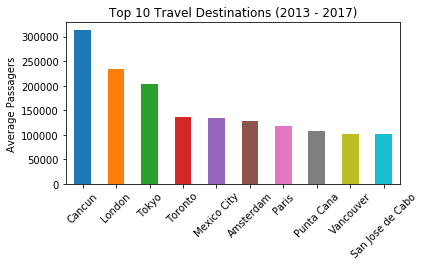

In [7]:
cities_averages_all_years = cities_month_rename[["Cancun(avg)","London(avg)","Tokyo(avg)","Toronto(avg)",
                                             "Mexico City(avg)","Amsterdam(avg)","Paris(avg)",
                                            "Punta Cana(avg)","Vancouver(avg)","San Jose del Cabo(avg)"]]
rename_for_chart = cities_averages_all_years.rename(columns={"Cancun(avg)":"Cancun","London(avg)":"London",
                                                             "Tokyo(avg)":"Tokyo","Toronto(avg)":"Toronto",
                                                             "Mexico City(avg)":"Mexico City","Amsterdam(avg)":"Amsterdam",
                                                             "Paris(avg)":"Paris","Punta Cana(avg)":"Punta Cana",
                                                             "Vancouver(avg)":"Vancouver",
                                                             "San Jose del Cabo(avg)":"San Jose de Cabo"})
cities_pass_sum = rename_for_chart.mean()
city_name = cities_pass_sum.keys()
cities_plot = cities_pass_sum.plot(kind="bar")
plt.xticks(rotation=45)
plt.title("Top 10 Travel Destinations (2013 - 2017)")
plt.ylabel("Average Passagers")
plt.tight_layout()
plt.savefig("Resources/top_10_bar_chart.png")

plt.show()

In [8]:
# import csv for  weather by city
weather_df = pd.read_csv(weather)
# first rename the columns for better visualization when we transpose the columns/rows
weather_rename = weather_df.rename(columns={"City":" "})
# set index to the new renamed column
weather_set_index = weather_rename.set_index(" ")
# transpose the to have columns and rows switched
weather_transp = weather_set_index.T
# reset index so we can manipulate the column with the Months
weather_reset_index = weather_transp.reset_index()
# rename again to keep the same column name to match with the weather dataframe when we merge
weather_month_rename = weather_reset_index.rename(columns={"index":"Month"})


In [9]:
# create new DF with the passengers and weather dataframe merging on Month
averages_passenger_temp = pd.merge(cities_month_rename,
                                   weather_month_rename,on="Month",how="left")
# creatae new DF with only the columns to be manipulated
averages_df = averages_passenger_temp[['Month','Amsterdam(avg)','Amsterdam(avg.Temp)',
                                       'Cancun(avg)','Cancun(avg.Temp)',
                                       'London(avg)','London(avg.Temp)',
                                       'Mexico City(avg)','Mexico City(avg.Temp)',
                                       'Paris(avg)','Paris(avg.Temp)', 'Punta Cana(avg)',
                                       'Punta Cana(avg.Temp)','San Jose del Cabo(avg)',
                                       'San Jose del Cabo(avg.Temp)', 'Tokyo(avg)',
                                       'Tokyo(avg.Temp)', 'Toronto(avg)','Toronto(avg.Temp)',
                                       'Vancouver(avg)','Vancouver(avg.Temp)']]

# save as csv
save_csv = averages_df.to_csv("Resources/averages_temp_passengers.csv")


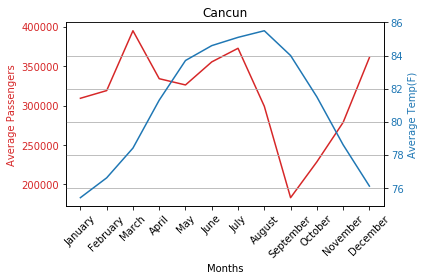

In [10]:
## CANCUN ##

# set x_axis for passengers vs temperatures plot
# months will be variable to hold the months names
months = averages_df['Month']
# x_axis will be the range in the lenght of the column Month
x_axis = np.arange(len(months))
# define tick locations
tick_locations = [month for month in x_axis]

# average passengers vs average weather for CANCUN
# we will plot passengers and weather as y_axis 
# x_axis will be the months we defined above

can = averages_df['Cancun(avg)']
can_weather = averages_df['Cancun(avg.Temp)']

# create subplot
fig, ax1 = plt.subplots()

# xlabel will be the Months and only needs to be set once for both
ax1.set_xlabel('Months')

# set variable to color of Passengers labels
color = 'tab:red'
# set the label paramenters for Passengers
ax1.set_ylabel('Average Passengers', color=color)
# plot the line for Passengers calling the color defined about
ax1.plot(x_axis, can, color=color)
# call the ticks and define paraments and color to match the line color
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# set variable to color of Weather labels
color = 'tab:blue'
# set the label paramenters for Weather
ax2.set_ylabel('Average Temp(F)', color=color)  
# plot the line for Weather calling the color defined about
ax2.plot(x_axis, can_weather, color=color)
# call the ticks and define paraments and color to match the line color
ax2.tick_params(axis='y', labelcolor=color)

# place tick locations for x_axis
plt.xticks(tick_locations, months)
# format x_axis ticks
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
# add grid to plot
plt.grid(True)
# add title
plt.title('Cancun')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
# save plot as png
plt.savefig('Resources/cancun_avg_pass_temp.png')
# display
plt.show()

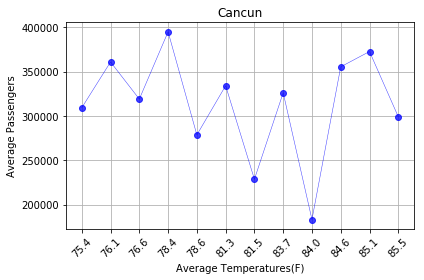

In [30]:
# create a new plot using only the passengers sorted by temperatures
can = averages_df['Cancun(avg)']
can_weather = averages_df['Cancun(avg.Temp)']
# from the original dataframe, call only the columns pertinent to Cancun
# sorte values on temperature ascending
sort_temp_can = averages_df[['Cancun(avg)','Cancun(avg.Temp)']].sort_values('Cancun(avg.Temp)')

# define x_axis values
temps = sort_temp_can['Cancun(avg.Temp)']
x_axis = np.arange(len(temps))
# define tick locations for x_axis
tick_locations = [temp for temp in x_axis]# plot a line graph with markers to show passengers vs temperature
plt.plot(x_axis, sort_temp_can['Cancun(avg)'],color='blue',marker='o',linewidth=.5,alpha=.75)
# place ticks for x_axis
plt.xticks(tick_locations, temps,rotation=45)
# add grip
plt.grid(True)
# add title and labels
plt.title('Cancun')
plt.xlabel('Average Temperatures(F)')
plt.ylabel('Average Passengers')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
plt.tight_layout()
# save plot into png
plt.savefig('Resources/cancun_temp_plot.png')
# display plot
plt.show()

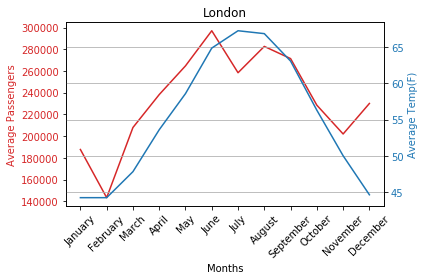

In [12]:
## LONDON ##

# set x_axis for passengers vs temperatures plot
# months will be variable to hold the months names
months = averages_df['Month']
# x_axis will be the range in the lenght of the column Month
x_axis = np.arange(len(months))
# define tick locations
tick_locations = [month for month in x_axis]

# average passengers vs average weather for LONDON
# we will plot passengers and weather as y_axis 
# x_axis will be the months we defined above
lon = averages_df['London(avg)']
lon_weather = averages_df['London(avg.Temp)']

# create subplot
fig, ax1 = plt.subplots()

# xlabel will be the Months and only needs to be set once for both
ax1.set_xlabel('Months')

# set variable to color of Passengers labels
color = 'tab:red'
# set the label paramenters for Passengers
ax1.set_ylabel('Average Passengers', color=color)
# plot the line for Passengers calling the color defined about
ax1.plot(x_axis, lon, color=color)
# call the ticks and define paraments and color to match the line color
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# set variable to color of Weather labels
color = 'tab:blue'
# set the label paramenters for Weather
ax2.set_ylabel('Average Temp(F)', color=color)  
# plot the line for Weather calling the color defined about
ax2.plot(x_axis, lon_weather, color=color)
# call the ticks and define paraments and color to match the line color
ax2.tick_params(axis='y', labelcolor=color)

# place tick locations for x_axis
plt.xticks(tick_locations, months)
# format x_axis ticks
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
# add grid to plot
plt.grid(True)
# add title
plt.title('London')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
# save plot as png
plt.savefig('Resources/london_avg_pass_temp.png')
# display
plt.show()

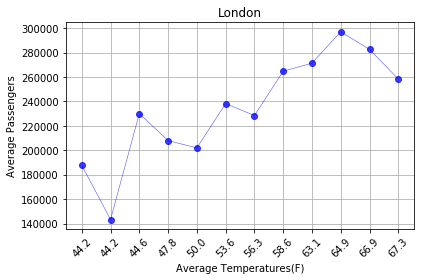

In [31]:
# create a new plot using only the passengers sorted by temperatures
lon = averages_df['London(avg)']
lon_weather = averages_df['London(avg.Temp)']
# from the original dataframe, call only the columns pertinent to London
# sorte values on temperature ascending
sort_temp_lon = averages_df[['London(avg)','London(avg.Temp)']].sort_values('London(avg.Temp)')

# define x_axis values
temps = sort_temp_lon['London(avg.Temp)']
x_axis = np.arange(len(temps))
# define tick locations for x_axis
tick_locations = [temp for temp in x_axis]
# plot a line graph with markers to show passengers vs temperature
plt.plot(x_axis, sort_temp_lon['London(avg)'],color='blue',marker='o',linewidth=.5,alpha=.75)
# place ticks for x_axis
plt.xticks(tick_locations, temps,rotation=45)
# add grip
plt.grid(True)
# add title and labels
plt.title('London')
plt.xlabel('Average Temperatures(F)')
plt.ylabel('Average Passengers')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
plt.tight_layout()
# save plot into png
plt.savefig('Resources/london_temp_plot.png')
# display plot
plt.show()

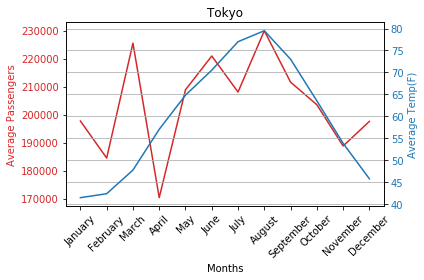

In [14]:
## TOKYO ##
# set x_axis for passengers vs temperatures plot
# months will be variable to hold the months names
months = averages_df['Month']
# x_axis will be the range in the lenght of the column Month
x_axis = np.arange(len(months))
# define tick locations
tick_locations = [month for month in x_axis]

# average passengers vs average weather for TOKYO
# we will plot passengers and weather as y_axis 
# x_axis will be the months we defined above
tok = averages_df['Tokyo(avg)']
tok_weather = averages_df['Tokyo(avg.Temp)']

# create subplot
fig, ax1 = plt.subplots()

# xlabel will be the Months and only needs to be set once for both
ax1.set_xlabel('Months')

# set variable to color of Passengers labels
color = 'tab:red'
# set the label paramenters for Passengers
ax1.set_ylabel('Average Passengers', color=color)
# plot the line for Passengers calling the color defined about
ax1.plot(x_axis, tok, color=color)
# call the ticks and define paraments and color to match the line color
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# set variable to color of Weather labels
color = 'tab:blue'
# set the label paramenters for Weather
ax2.set_ylabel('Average Temp(F)', color=color)  
# plot the line for Weather calling the color defined about
ax2.plot(x_axis, tok_weather, color=color)
# call the ticks and define paraments and color to match the line color
ax2.tick_params(axis='y', labelcolor=color)

# place tick locations for x_axis
plt.xticks(tick_locations, months)
# format x_axis ticks
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
# add grid to plot
plt.grid(True)
# add title
plt.title('Tokyo')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
# save plot as png
plt.savefig('Resources/tokyo_avg_pass_temp.png')
# display
plt.show()


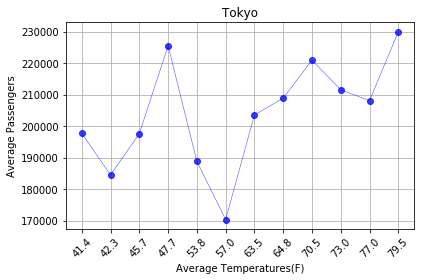

In [32]:
# create a new plot using only the passengers sorted by temperatures
tok = averages_df['Tokyo(avg)']
tok_weather = averages_df['Tokyo(avg.Temp)']

# from the original dataframe, call only the columns pertinent to Tokyo
# sorte values on temperature ascending
sort_temp_tok = averages_df[['Tokyo(avg)','Tokyo(avg.Temp)']].sort_values('Tokyo(avg.Temp)')

# define x_axis values
temps = sort_temp_tok['Tokyo(avg.Temp)']
x_axis = np.arange(len(temps))
# define tick locations for x_axis
tick_locations = [temp for temp in x_axis]
# plot a line graph with markers to show passengers vs temperature
plt.plot(x_axis, sort_temp_tok['Tokyo(avg)'],color='blue',marker='o',linewidth=.5,alpha=.75)
# place ticks for x_axis
plt.xticks(tick_locations, temps,rotation=45)
# add grip
plt.grid(True)
# add title and labels
plt.title('Tokyo')
plt.xlabel('Average Temperatures(F)')
plt.ylabel('Average Passengers')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
plt.tight_layout()
# save plot into png
plt.savefig('Resources/tokyo_temp_plot.png')
# display plot
plt.show()

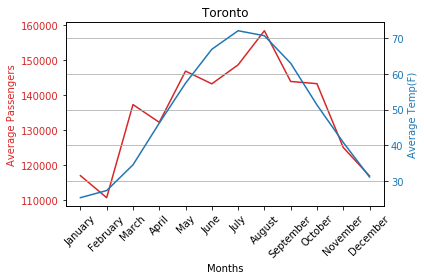

In [16]:
## TORONTO ##

# set x_axis for passengers vs temperatures plot
# months will be variable to hold the months names
months = averages_df['Month']
# x_axis will be the range in the lenght of the column Month
x_axis = np.arange(len(months))
# define tick locations
tick_locations = [month for month in x_axis]

# average passengers vs average weather for TORONTO
# we will plot passengers and weather as y_axis 
# x_axis will be the months we defined above

tor = averages_df['Toronto(avg)']
tor_weather = averages_df['Toronto(avg.Temp)']

# create subplot
fig, ax1 = plt.subplots()

# xlabel will be the Months and only needs to be set once for both
ax1.set_xlabel('Months')

# set variable to color of Passengers labels
color = 'tab:red'
# set the label paramenters for Passengers
ax1.set_ylabel('Average Passengers', color=color)
# plot the line for Passengers calling the color defined about
ax1.plot(x_axis, tor, color=color)
# call the ticks and define paraments and color to match the line color
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# set variable to color of Weather labels
color = 'tab:blue'
# set the label paramenters for Weather
ax2.set_ylabel('Average Temp(F)', color=color)  
# plot the line for Weather calling the color defined about
ax2.plot(x_axis, tor_weather, color=color)
# call the ticks and define paraments and color to match the line color
ax2.tick_params(axis='y', labelcolor=color)

# place tick locations for x_axis
plt.xticks(tick_locations, months)
# format x_axis ticks
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
# add grid to plot
plt.grid(True)
# add title
plt.title('Toronto')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
# save plot as png
plt.savefig('Resources/toronto_avg_pass_temp.png')
# display
plt.show()

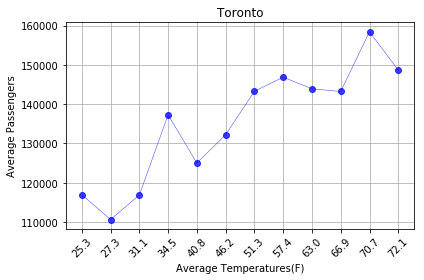

In [33]:
# create a new plot using only the passengers sorted by temperatures
tor = averages_df['Toronto(avg)']
tor_weather = averages_df['Toronto(avg.Temp)']

# from the original dataframe, call only the columns pertinent to TORONTO
# sorte values on temperature ascending
sort_temp_tor = averages_df[['Toronto(avg)','Toronto(avg.Temp)']].sort_values('Toronto(avg.Temp)')

# define x_axis values
temps = sort_temp_tor['Toronto(avg.Temp)']
x_axis = np.arange(len(temps))
# define tick locations for x_axis
tick_locations = [temp for temp in x_axis]
# plot a line graph with markers to show passengers vs temperature
plt.plot(x_axis, sort_temp_tor['Toronto(avg)'],color='blue',marker='o',linewidth=.5,alpha=.75)
# place ticks for x_axis
plt.xticks(tick_locations, temps,rotation=45)
# add grip
plt.grid(True)
# add title and labels
plt.title('Toronto')
plt.xlabel('Average Temperatures(F)')
plt.ylabel('Average Passengers')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
plt.tight_layout()
# save plot into png
plt.savefig('Resources/toronto_temp_plot.png')
# display plot
plt.show()

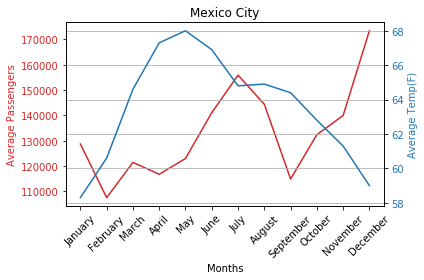

In [34]:
## MEXICO CITY ##

# set x_axis for passengers vs temperatures plot
# months will be variable to hold the months names
months = averages_df['Month']
# x_axis will be the range in the lenght of the column Month
x_axis = np.arange(len(months))
# define tick locations
tick_locations = [month for month in x_axis]

# average passengers vs average weather for MEXICO CITY
# we will plot passengers and weather as y_axis 
# x_axis will be the months we defined above
mex = averages_df['Mexico City(avg)']
mex_weather = averages_df['Mexico City(avg.Temp)']

# create subplot
fig, ax1 = plt.subplots()

# xlabel will be the Months and only needs to be set once for both
ax1.set_xlabel('Months')

# set variable to color of Passengers labels
color = 'tab:red'
# set the label paramenters for Passengers
ax1.set_ylabel('Average Passengers', color=color)
# plot the line for Passengers calling the color defined about
ax1.plot(x_axis, mex, color=color)
# call the ticks and define paraments and color to match the line color
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# set variable to color of Weather labels
color = 'tab:blue'
# set the label paramenters for Weather
ax2.set_ylabel('Average Temp(F)', color=color)  
# plot the line for Weather calling the color defined about
ax2.plot(x_axis, mex_weather, color=color)
# call the ticks and define paraments and color to match the line color
ax2.tick_params(axis='y', labelcolor=color)

# place tick locations for x_axis
plt.xticks(tick_locations, months)
# format x_axis ticks
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
# add grid to plot
plt.grid(True)
# add title
plt.title('Mexico City')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
plt.tight_layout()
# save plot as png
plt.savefig('Resources/mexico_city_avg_pass_temp.png')
# display
plt.show()

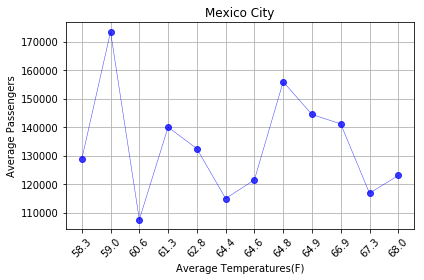

In [35]:
# create a new plot using only the passengers sorted by temperatures
mex = averages_df['Mexico City(avg)']
mex_weather = averages_df['Mexico City(avg.Temp)']

# from the original dataframe, call only the columns pertinent to Mexico City
# sorte values on temperature ascending
sort_temp_mex = averages_df[['Mexico City(avg)','Mexico City(avg.Temp)']].sort_values('Mexico City(avg.Temp)')

# define x_axis values
temps = sort_temp_mex['Mexico City(avg.Temp)']
x_axis = np.arange(len(temps))
# define tick locations for x_axis
tick_locations = [temp for temp in x_axis]# plot a line graph with markers to show passengers vs temperature
plt.plot(x_axis, sort_temp_mex['Mexico City(avg)'],color='blue',marker='o',linewidth=.5,alpha=.75)
# place ticks for x_axis
plt.xticks(tick_locations, temps,rotation=45)
# add grip
plt.grid(True)
# add title and labels
plt.title('Mexico City')
plt.xlabel('Average Temperatures(F)')
plt.ylabel('Average Passengers')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
plt.tight_layout()
# save plot into png
plt.savefig('Resources/mexico_city_temp_plot.png')
# display plot
plt.show()

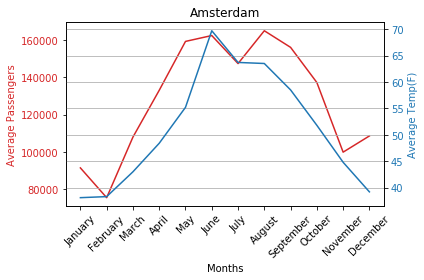

In [36]:
## AMSTERDAM ##

# set x_axis for passengers vs temperatures plot
# months will be variable to hold the months names
months = averages_df['Month']
# x_axis will be the range in the lenght of the column Month
x_axis = np.arange(len(months))
# define tick locations
tick_locations = [month for month in x_axis]

# average passengers vs average weather for AMSTERDAM
# we will plot passengers and weather as y_axis 
# x_axis will be the months we defined above
ams = averages_df['Amsterdam(avg)']
ams_weather = averages_df['Amsterdam(avg.Temp)']

# create subplot
fig, ax1 = plt.subplots()

# xlabel will be the Months and only needs to be set once for both
ax1.set_xlabel('Months')

# set variable to color of Passengers labels
color = 'tab:red'
# set the label paramenters for Passengers
ax1.set_ylabel('Average Passengers', color=color)
# plot the line for Passengers calling the color defined about
ax1.plot(x_axis, ams, color=color)
# call the ticks and define paraments and color to match the line color
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# set variable to color of Weather labels
color = 'tab:blue'
# set the label paramenters for Weather
ax2.set_ylabel('Average Temp(F)', color=color)  
# plot the line for Weather calling the color defined about
ax2.plot(x_axis, ams_weather, color=color)
# call the ticks and define paraments and color to match the line color
ax2.tick_params(axis='y', labelcolor=color)

# place tick locations for x_axis
plt.xticks(tick_locations, months)
# format x_axis ticks
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
# add grid to plot
plt.grid(True)
# add title
plt.title('Amsterdam')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
plt.tight_layout()
# save plot as png
plt.savefig('Resources/amsterdam_avg_pass_temp.png')
# display
plt.show()

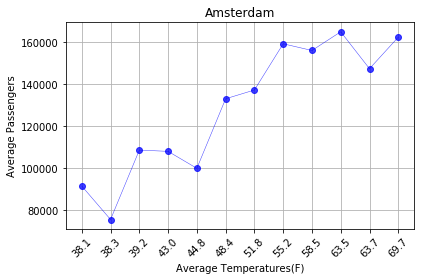

In [37]:
# create a new plot using only the passengers sorted by temperatures
ams = averages_df['Amsterdam(avg)']
ams_weather = averages_df['Amsterdam(avg.Temp)']

# from the original dataframe, call only the columns pertinent to AMSTERDAM
# sorte values on temperature ascending
sort_temp_ams = averages_df[['Amsterdam(avg)','Amsterdam(avg.Temp)']].sort_values('Amsterdam(avg.Temp)')

# define x_axis values
temps = sort_temp_ams['Amsterdam(avg.Temp)']
x_axis = np.arange(len(temps))
# define tick locations for x_axis
tick_locations = [temp for temp in x_axis]# plot a line graph with markers to show passengers vs temperature
plt.plot(x_axis, sort_temp_ams['Amsterdam(avg)'],color='blue',marker='o',linewidth=.5,alpha=.75)
# place ticks for x_axis
plt.xticks(tick_locations, temps,rotation=45)
# add grip
plt.grid(True)
# add title and labels
plt.title('Amsterdam')
plt.xlabel('Average Temperatures(F)')
plt.ylabel('Average Passengers')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
plt.tight_layout()
# save plot into png
plt.savefig('Resources/amsterdam_temp_plot.png')
# display plot
plt.show()

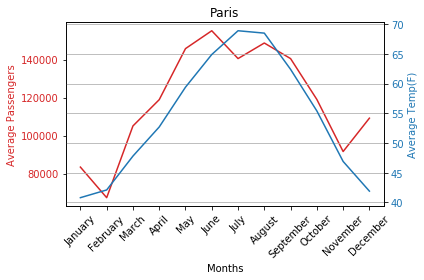

In [22]:
## PARIS ##

# set x_axis for passengers vs temperatures plot
# months will be variable to hold the months names
months = averages_df['Month']
# x_axis will be the range in the lenght of the column Month
x_axis = np.arange(len(months))
# define tick locations
tick_locations = [month for month in x_axis]

# average passengers vs average weather for PARIS
# we will plot passengers and weather as y_axis 
# x_axis will be the months we defined above
par = averages_df["Paris(avg)"]
par_weather = averages_df['Paris(avg.Temp)']

# create subplot
fig, ax1 = plt.subplots()

# xlabel will be the Months and only needs to be set once for both
ax1.set_xlabel('Months')

# set variable to color of Passengers labels
color = 'tab:red'
# set the label paramenters for Passengers
ax1.set_ylabel('Average Passengers', color=color)
# plot the line for Passengers calling the color defined about
ax1.plot(x_axis, par, color=color)
# call the ticks and define paraments and color to match the line color
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# set variable to color of Weather labels
color = 'tab:blue'
# set the label paramenters for Weather
ax2.set_ylabel('Average Temp(F)', color=color)  
# plot the line for Weather calling the color defined about
ax2.plot(x_axis, par_weather, color=color)
# call the ticks and define paraments and color to match the line color
ax2.tick_params(axis='y', labelcolor=color)

# place tick locations for x_axis
plt.xticks(tick_locations, months)
# format x_axis ticks
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
# add grid to plot
plt.grid(True)
# add title
plt.title('Paris')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
# save plot as png
plt.savefig('Resources/paris_avg_pass_temp.png')
# display
plt.show()

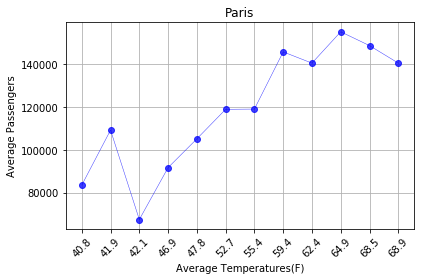

In [38]:
# create a new plot using only the passengers sorted by temperatures
par = averages_df["Paris(avg)"]
par_weather = averages_df['Paris(avg.Temp)']

# from the original dataframe, call only the columns pertinent to PARIS
# sorte values on temperature ascending
sort_temp_par = averages_df[['Paris(avg)','Paris(avg.Temp)']].sort_values('Paris(avg.Temp)')

# define x_axis values
temps = sort_temp_par['Paris(avg.Temp)']
x_axis = np.arange(len(temps))
# define tick locations for x_axis
tick_locations = [temp for temp in x_axis]
# plot a line graph with markers to show passengers vs temperature
plt.plot(x_axis, sort_temp_par['Paris(avg)'],color='blue',marker='o',linewidth=.5,alpha=.75)
# place ticks for x_axis
plt.xticks(tick_locations, temps,rotation=45)
# add grip
plt.grid(True)
# add title and labels
plt.title('Paris')
plt.xlabel('Average Temperatures(F)')
plt.ylabel('Average Passengers')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
plt.tight_layout()
# save plot into png
plt.savefig('Resources/paris_temp_plot.png')
# display plot
plt.show()

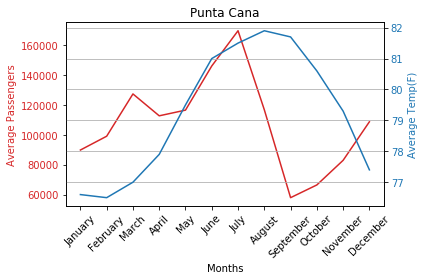

In [24]:
## PUNTA CANA ##

# set x_axis for passengers vs temperatures plot
# months will be variable to hold the months names
months = averages_df['Month']
# x_axis will be the range in the lenght of the column Month
x_axis = np.arange(len(months))
# define tick locations
tick_locations = [month for month in x_axis]

# average passengers vs average weather for PUNTA CANA
# we will plot passengers and weather as y_axis 
# x_axis will be the months we defined above
pun = averages_df['Punta Cana(avg)']
pun_weather = averages_df['Punta Cana(avg.Temp)']

# create subplot
fig, ax1 = plt.subplots()

# xlabel will be the Months and only needs to be set once for both
ax1.set_xlabel('Months')

# set variable to color of Passengers labels
color = 'tab:red'
# set the label paramenters for Passengers
ax1.set_ylabel('Average Passengers', color=color)
# plot the line for Passengers calling the color defined about
ax1.plot(x_axis, pun, color=color)
# call the ticks and define paraments and color to match the line color
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# set variable to color of Weather labels
color = 'tab:blue'
# set the label paramenters for Weather
ax2.set_ylabel('Average Temp(F)', color=color)  
# plot the line for Weather calling the color defined about
ax2.plot(x_axis, pun_weather, color=color)
# call the ticks and define paraments and color to match the line color
ax2.tick_params(axis='y', labelcolor=color)

# place tick locations for x_axis
plt.xticks(tick_locations, months)
# format x_axis ticks
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
# add grid to plot
plt.grid(True)
# add title
plt.title('Punta Cana')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
# save plot as png
plt.savefig('Resources/punta_cana_avg_pass_temp.png')
# display
plt.show()

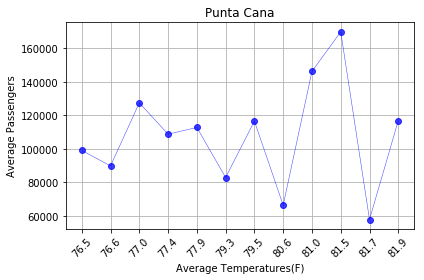

In [39]:
# create a new plot using only the passengers sorted by temperatures
pun = averages_df['Punta Cana(avg)']
pun_weather = averages_df['Punta Cana(avg.Temp)']

# from the original dataframe, call only the columns pertinent to PUNTA CANAa
# sorte values on temperature ascending
sort_temp_pun = averages_df[['Punta Cana(avg)','Punta Cana(avg.Temp)']].sort_values('Punta Cana(avg.Temp)')

# define x_axis values
temps = sort_temp_pun['Punta Cana(avg.Temp)']
x_axis = np.arange(len(temps))
# define tick locations for x_axis
tick_locations = [temp for temp in x_axis]# plot a line graph with markers to show passengers vs temperature
plt.plot(x_axis, sort_temp_pun['Punta Cana(avg)'],color='blue',marker='o',linewidth=.5,alpha=.75)
# place ticks for x_axis
plt.xticks(tick_locations, temps,rotation=45)
# add grip
plt.grid(True)
# add title and labels
plt.title('Punta Cana')
plt.xlabel('Average Temperatures(F)')
plt.ylabel('Average Passengers')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
plt.tight_layout()
# save plot into png
plt.savefig('Resources/punta_cana_temp_plot.png')
# display plot
plt.show()

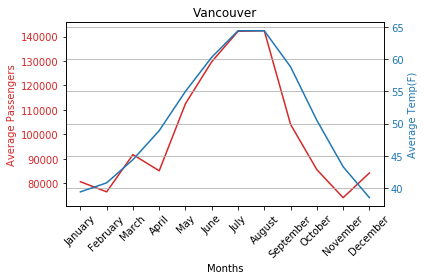

In [26]:
## VANCOUVER ##

# set x_axis for passengers vs temperatures plot
# months will be variable to hold the months names
months = averages_df['Month']
# x_axis will be the range in the lenght of the column Month
x_axis = np.arange(len(months))
# define tick locations
tick_locations = [month for month in x_axis]

# average passengers vs average weather for VANCOUVER
# we will plot passengers and weather as y_axis 
# x_axis will be the months we defined above
van = averages_df['Vancouver(avg)']
van_weather = averages_df['Vancouver(avg.Temp)']

# create subplot
fig, ax1 = plt.subplots()

# xlabel will be the Months and only needs to be set once for both
ax1.set_xlabel('Months')

# set variable to color of Passengers labels
color = 'tab:red'
# set the label paramenters for Passengers
ax1.set_ylabel('Average Passengers', color=color)
# plot the line for Passengers calling the color defined about
ax1.plot(x_axis, van, color=color)
# call the ticks and define paraments and color to match the line color
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# set variable to color of Weather labels
color = 'tab:blue'
# set the label paramenters for Weather
ax2.set_ylabel('Average Temp(F)', color=color)  
# plot the line for Weather calling the color defined about
ax2.plot(x_axis, van_weather, color=color)
# call the ticks and define paraments and color to match the line color
ax2.tick_params(axis='y', labelcolor=color)

# place tick locations for x_axis
plt.xticks(tick_locations, months)
# format x_axis ticks
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
# add grid to plot
plt.grid(True)
# add title
plt.title('Vancouver')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
# save plot as png
plt.savefig('Resources/vancouver_avg_pass_temp.png')
# display
plt.show()

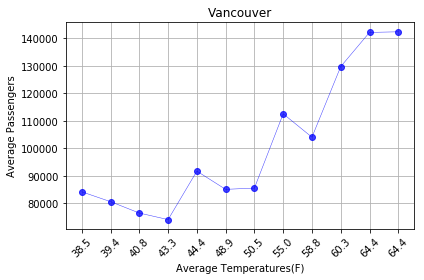

In [40]:
# create a new plot using only the passengers sorted by temperatures
van = averages_df['Vancouver(avg)']
van_weather = averages_df['Vancouver(avg.Temp)']

# from the original dataframe, call only the columns pertinent to VANCOUVER
# sorte values on temperature ascending
sort_temp_van = averages_df[['Vancouver(avg)','Vancouver(avg.Temp)']].sort_values('Vancouver(avg.Temp)')

# define x_axis values
temps = sort_temp_van['Vancouver(avg.Temp)']
x_axis = np.arange(len(temps))
# define tick locations for x_axis
tick_locations = [temp for temp in x_axis]
# plot a line graph with markers to show passengers vs temperature
plt.plot(x_axis, sort_temp_van['Vancouver(avg)'],color='blue',marker='o',linewidth=.5,alpha=.75)
# place ticks for x_axis
plt.xticks(tick_locations, temps,rotation=45)
# add grip
plt.grid(True)
# add title and labels
plt.title('Vancouver')
plt.xlabel('Average Temperatures(F)')
plt.ylabel('Average Passengers')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
plt.tight_layout()
# save plot into png
plt.savefig('Resources/vancouver_temp_plot.png')
# display plot
plt.show()

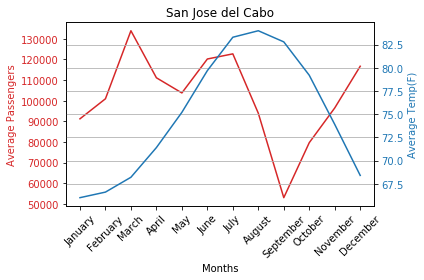

In [28]:
## SAN JOSE DEL CABO ##

# set x_axis for passengers vs temperatures plot
# months will be variable to hold the months names
months = averages_df['Month']
# x_axis will be the range in the lenght of the column Month
x_axis = np.arange(len(months))
# define tick locations
tick_locations = [month for month in x_axis]

# average passengers vs average weather for SAN JOSE DEL CABO
# we will plot passengers and weather as y_axis 
# x_axis will be the months we defined above
sjd = averages_df['San Jose del Cabo(avg)']
sjd_weather = averages_df['San Jose del Cabo(avg.Temp)']

# create subplot
fig, ax1 = plt.subplots()

# xlabel will be the Months and only needs to be set once for both
ax1.set_xlabel('Months')

# set variable to color of Passengers labels
color = 'tab:red'
# set the label paramenters for Passengers
ax1.set_ylabel('Average Passengers', color=color)
# plot the line for Passengers calling the color defined about
ax1.plot(x_axis, sjd, color=color)
# call the ticks and define paraments and color to match the line color
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# set variable to color of Weather labels
color = 'tab:blue'
# set the label paramenters for Weather
ax2.set_ylabel('Average Temp(F)', color=color)  
# plot the line for Weather calling the color defined about
ax2.plot(x_axis, sjd_weather, color=color)
# call the ticks and define paraments and color to match the line color
ax2.tick_params(axis='y', labelcolor=color)

# place tick locations for x_axis
plt.xticks(tick_locations, months)
# format x_axis ticks
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
# add grid to plot
plt.grid(True)
# add title
plt.title('San Jose del Cabo')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
# save plot as png
plt.savefig('Resources/san_jose_cabo_avg_pass_temp.png')
# display
plt.show()

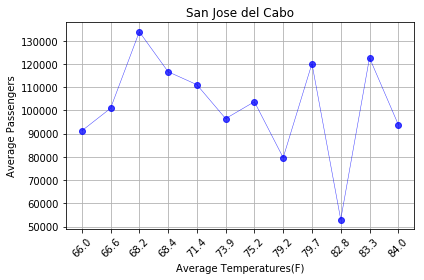

In [41]:
# create a new plot using only the passengers sorted by temperatures
sjd = averages_df['San Jose del Cabo(avg)']
sjd_weather = averages_df['San Jose del Cabo(avg.Temp)']

# from the original dataframe, call only the columns pertinent to SAN JOSE DEL CABO
# sorte values on temperature ascending
sort_temp_sjd = averages_df[['San Jose del Cabo(avg)','San Jose del Cabo(avg.Temp)']].sort_values('San Jose del Cabo(avg.Temp)')

# define x_axis values
temps = sort_temp_sjd['San Jose del Cabo(avg.Temp)']
x_axis = np.arange(len(temps))
# define tick locations for x_axis
tick_locations = [temp for temp in x_axis]# plot a line graph with markers to show passengers vs temperature
plt.plot(x_axis, sort_temp_sjd['San Jose del Cabo(avg)'],color='blue',marker='o',linewidth=.5,alpha=.75)
# place ticks for x_axis
plt.xticks(tick_locations, temps,rotation=45)
# add grip
plt.grid(True)
# add title and labels
plt.title('San Jose del Cabo')
plt.xlabel('Average Temperatures(F)')
plt.ylabel('Average Passengers')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
plt.tight_layout()
# save plot into png
plt.savefig('Resources/san_jose_cabo_temp_plot.png')
# display plot
plt.show()